In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
# Creating a house price dataset manually
np.random.seed(42)

data = {
    "Median_Income": np.random.uniform(2, 10, 100),
    "House_Age": np.random.randint(1, 50, 100),
    "Avg_Rooms": np.random.uniform(3, 8, 100),
    "Population": np.random.randint(500, 5000, 100),
    "Latitude": np.random.uniform(32, 42, 100),
    "Longitude": np.random.uniform(-124, -114, 100)
}

df = pd.DataFrame(data)

# Continuous target (house price)
df["House_Price"] = (
    50000 * df["Median_Income"]
    - 300 * df["House_Age"]
    + 20000 * df["Avg_Rooms"]
    + np.random.normal(0, 20000, 100)
)

df.head()


,Median_Income,House_Age,Avg_Rooms,Population,Latitude,Longitude,House_Price
0,4.996321,32,3.082939,2341,32.693613,-114.367775,305877.518815
1,9.605714,39,5.560465,2955,33.007780,-123.878455,536377.711831
2,7.855952,49,4.132479,1024,32.182218,-114.301212,451012.864324
3,6.789268,32,6.225864,3450,32.944430,-123.568401,481069.585537
4,3.248149,4,3.871832,4631,38.830068,-115.088569,258275.046612


In [3]:
df.info()
df.describe()
X = df.drop("House_Price", axis=1)
y = df["House_Price"]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Median_Income  100 non-null    float64
 1   House_Age      100 non-null    int32  
 2   Avg_Rooms      100 non-null    float64
 3   Population     100 non-null    int32  
 4   Latitude       100 non-null    float64
 5   Longitude      100 non-null    float64
 6   House_Price    100 non-null    float64
dtypes: float64(5), int32(2)
memory usage: 4.8 KB


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [5]:
comparison = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price": y_pred
})

comparison.head()


,Actual Price,Predicted Price
0,182703.590007,190568.566925
1,514060.339263,533816.249782
2,546929.381623,555269.987627
3,427890.166642,443758.657071
4,293164.943237,272868.786465


In [6]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 12773.427975835348
RMSE: 15540.035364619029


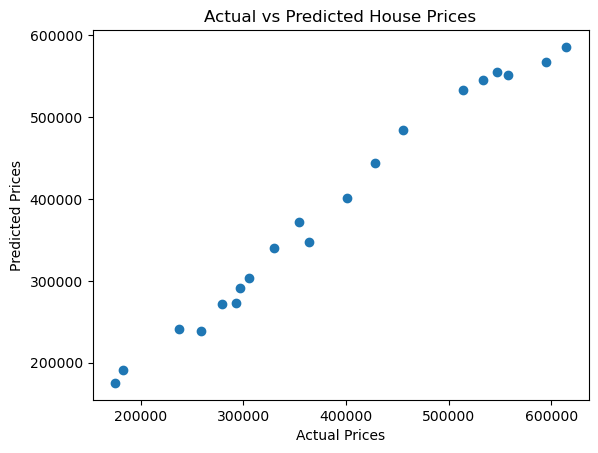

In [7]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [8]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients


,Feature,Coefficient
0,Median_Income,49904.902985
1,House_Age,-357.313218
2,Avg_Rooms,19655.148090
3,Population,0.986716
4,Latitude,-768.473698
5,Longitude,-117.362350
